## TP3 : Logistic regression

The purpose of this tutorial is to implement and use the Logistic Regression for binary classification. We will apply this
method to the problem of handwritten characters to learn how to
distinguish two numbers (here 5 and 6).


In [1]:
from pylab import *
#import numpy as np
#import matplotlib.pyplot as plt

from numpy import linalg as la

## 1. Logistic regression, IRLS algorithm.

### Preliminary question: the algorithm

#### Have a look at the function `regression_logistique.m` and locate the main steps of the algorithm you have been taught (see course).
You can comment the code in the cell below.

In [2]:
def regression_logistique(X,t,Nitermax=20,eps_conv=1e-3):
    '''Entrees :
    X = [ones(N_train,1) x_train];
    t = class_train 
    Nitermax = nombre maximale d'itérations (20 par défaut)
    eps_conv = critère de convergence sur norm(w-w_old)/norm(w) ; 
    eps_conv=1e-3 par défaut
    
    Sorties : 
    w : vecteur des coefficients de régression logistique
    Niter : nombre d'itérations utilisées effectivement
   
    Fonction de régression logistique pour la classification binaire.
   
    Utilisation :
       Nitermax = 50
       eps_conv = 1e-4
       [w,Niter] = regression_logistique(X,t,Nitermax,eps_conv)
    '''
    N_train = X.shape[0]

    # Initialization of the algorithm : w_0 = vect(0, ..., 0)
    w = np.zeros((X.shape[1],))
    w_old = w 
    
    y = 1/2*np.ones((N_train,))    
    R = np.diag(y*(1-y))                   # Reweighting matrix
    z = X.dot(w_old)-la.inv(R).dot(y-t)    # defining z from w_old and y_old

    w = la.inv(X.T.dot(R).dot(X)).dot(X.T).dot(R).dot(z)  # w_new

    # loop of the Newton-Raphson algorithm
    Niter = 1
    while ( (la.norm(w-w_old)/la.norm(w)>eps_conv) and (Niter<Nitermax) ):   # convergence criterion
        Niter = Niter+1
        y = 1/(1+np.exp(-X.dot(w)))   # new y
        R = np.diag(y*(1-y))          # new reweighting matrix  
        w_old = w 
        z = X.dot(w_old)-la.inv(R).dot(y-t)                     # new z
        w = la.inv(X.T.dot(R).dot(X)).dot(X.T).dot(R).dot(z)    # updating w_new
         
    return w, Niter


### Reading & preparing synthetic data

Load the training and test data sets `synth_train.txt`
and `synth_test.txt`. The targets t belong to {1,2} and the features  
x belong to R^2. 

We have 100 training samples and 200 test samples

* the 1st column contains the label of each sample, 
* columns 2 and 3 contain the coordinate of each point.

In [3]:
# Training set
synth_train = np.loadtxt('synth_train.txt') 

class_train = synth_train[:,0]
class_train_1 = np.where(synth_train[:,0]==1)[0]
class_train_2 = np.where(synth_train[:,0]==2)[0]
x_train = synth_train[:,1:]
N_train = np.size(x_train,axis=0)

# Test set
synth_test = np.loadtxt('synth_test.txt')

class_test = synth_test[:,0]
class_test_1 = np.where(synth_test[:,0]==1)[0]
class_test_2 = np.where(synth_test[:,0]==2)[0]
x_test = synth_test[:,1:]
N_test = np.size(x_test,axis=0)


### Preparing features for logistic regression (binary classification)
First, we prepare the feature matrix and the target vector associated to 
the training and test sets:


In [4]:
X = np.hstack((np.ones((N_train,1)),x_train))
t = 2-class_train   # 0 if class=2, 1 if class=1

X_test = np.hstack((np.ones((N_test,1)),x_test))
t_test = 2-class_test   # 0 if class=2, 1 if class=1

### Exercise 1 : the logistic function of decision

1. Use the function `regression_logistique.m` to estimate the logistic
regression vector `w`. *Indication : use `Nitermax = 50;
eps_conv=1e-3;`.*
2. Compute the decision function $f(x) = argmax_k P(C_k|x)$ on the test set
to get the classification results. Recall that $y_n=\sigma(w^T x)$ (logistic function)
and that *using vectors* you may directly write $y=\sigma(Xw)$, with the
column of ones in X.
3. Display the results by plotting the points from both the training set
and the test set.
4. Write the equation which defines the decision boundary.
5. Artificially add a few points to the training set far from the decision boundary to check the robustness of logistic regression to outliers. Check the behaviour of LDA for comparison in this case and comment. 


***Question 1 : Estimation of $w$***

In [5]:
# logistic regression vector w
w, Niter = regression_logistique(X, t, Nitermax = 50, eps_conv = 1e-3)
print("The regression vector is : ")
print(w)

The regression vector is : 
[-15.206658    -7.91866363   6.56243114]


The 1st coefficient corresponds to the bias. the 2nd and the 3rd correpond respectively to the coefficient of the 1st and 2nd feature. 

***Question 2 : Decision function *** 

In [6]:
# decision function
def log_prediction(X, w):
    return np.where(1/(1+np.exp(-X.dot(w))) >= 0.5, 1, 0)

*Performance estimation:*

In [23]:
class_train_pred = log_prediction(X, w)        # predicted classes for the train set
class_test_pred = log_prediction(X_test, w)    # predicted classes for the test set

# error rates on the train and test sets
error_rate_train = np.sum(abs(class_train_pred - t))/N_train
error_rate_test = np.sum(abs(class_test_pred - t_test))/N_test

print("Train set error rate : " +str(round(error_rate_train, 3)*100)+'%')
print("Test set error rate : " +str(round(error_rate_test, 3)*100)+'%')

Train set error rate : 3.0%
Test set error rate : 6.0%


In [20]:
# confusion matrix on the train set
from sklearn.metrics import confusion_matrix
confusion_matrix(t, class_train_pred, normalize='true')   # normalizing along the rows (true labels)

array([[0.98717949, 0.01282051],
       [0.09090909, 0.90909091]])

In [9]:
# confusion matrix on the test set
confusion_matrix(t_test, class_test_pred, normalize='true')

array([[0.98550725, 0.01449275],
       [0.16129032, 0.83870968]])

In [10]:
import pandas as pd 

labels = ['label', 'x1', 'x2']
df_train = pd.DataFrame(synth_train, columns=labels)

df_train['label'].value_counts(normalize=True)

2.0    0.78
1.0    0.22
Name: label, dtype: float64

In [11]:
df_test = pd.DataFrame(synth_test, columns=labels)
df_test['label'].value_counts(normalize = True)

2.0    0.69
1.0    0.31
Name: label, dtype: float64

**Comment: ** The points labeled 2 but were actually 1 make the largest part of error. One explanation could be that the rate of points in class $C_2$ in the train set is a bit larger than the same rate in the test set. 

***Question 3: Display of results ***

You can draw the decision boundary $w^Tx = 0$ (equivalent to $\sigma(w^Tx) = 0.5$) by using: 


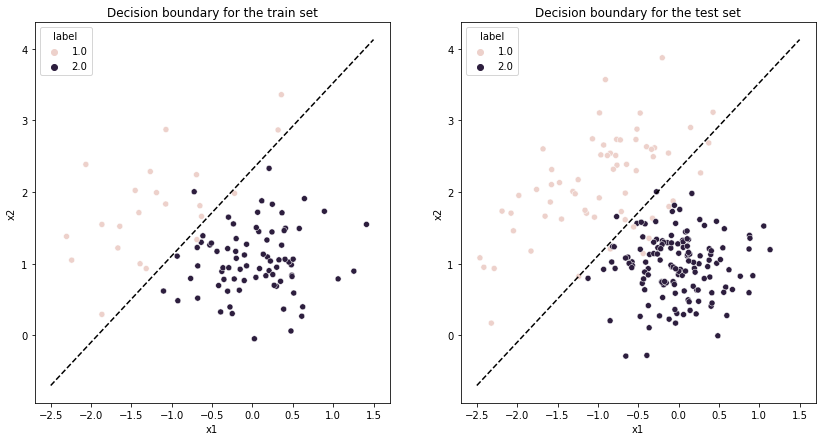

In [68]:
import pandas as pd 
import seaborn as sns
labels = ["label", "x1", "x2"]

x1 = np.linspace(-2.5,1.5,10) 
x2 = (-w[0]-w[1]*x1)/w[2]

plt.figure(figsize = (14, 7))

# plot of the boundary for the train set
ax1 = plt.subplot(121)
sns.scatterplot(data = df_train, x = "x1", y = "x2", hue = "label")
ax1.plot(x1,x2,'k--')
ax1.set_xlabel('x1'), ax1.set_ylabel('x2')
ax1.title.set_text('Decision boundary for the train set')

# plot of the boundary for the test set
ax2 = plt.subplot(122)
sns.scatterplot(data = df_test, x = "x1", y = "x2", hue = "label")
ax2.plot(x1,x2,'k--')
ax2.set_xlabel('x1'), ax2.set_ylabel('x2')
ax2.title.set_text('Decision boundary for the test set')


***Question 4: Equation of the decision boundary***

The equation of the decision boundary is: 

\begin{align*}
\tilde{w}^T\tilde{x}= 0 & \Rightarrow w_1x_1 + w_2x_2 + w_0 = 0 \\
& \Rightarrow  x_2 = -\frac{w_1}{w_2}x_1 - \frac{w_0}{w_2}
\end{align*}

***Question 5 : Robustness comparison of LDA and Logistic regression w.r.t outliers***


*Using Logictic Regression with outliers*

In [51]:
# creating outliers in the region of class 2 
input_outliers = np.array([[1, 6, -2], [1 , 6.3, -3], [1 , 6.5, -2.5], [1, 6.1, -2.3], [1, 7, -2.9], [1, 6.2, -2.1], [1, 6.6, -2.5], [1, 7, -2]])
class_outliers = np.array([0, 0, 0, 0, 0, 0, 0, 0])

X_out = np.concatenate((X, input_outliers), axis = 0)             # train input after adding outliers 
t_out = np.concatenate((t, class_outliers), axis = 0)    # classes after adding outliers

# new log. reg. vector  
w_out, Niter_out = regression_logistique(X_out, t_out) 

# printing the log reg vector 
print("The new logistic regression vector is : ", w_out)
print("The old logistic regression vector is : ", w)


The new logistic regression vector is :  [-15.20665796  -7.91866361   6.56243112]
The old logistic regression vector is :  [-15.206658    -7.91866363   6.56243114]


*Display of boundaries*

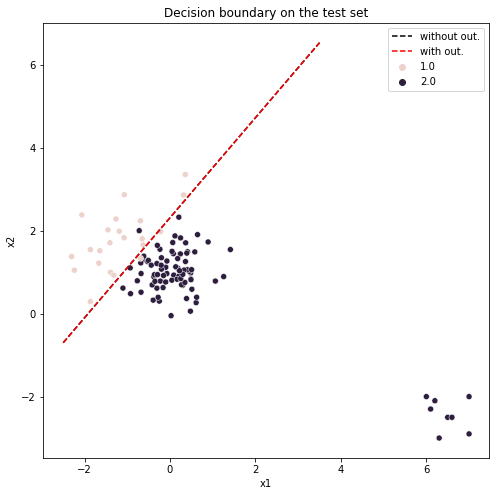

In [57]:
x1 = np.linspace(-2.5,3.5,10) 
x2 = (-w[0]-w[1]*x1)/w[2]                    # using coefficients estimated without outliers 
x2_out = (-w_out[0]-w_out[1]*x1)/w_out[2]    # using coefficients estimated with outliers 

# Train DataFrame with outliers
df_train_out = pd.DataFrame(X_out[:, 1:], columns = labels[1:])
df_train_out['label'] = pd.Series(2 - t_out)

# plotting decision boundaries 
plt.figure(figsize = (8, 8))
sns.scatterplot(data = df_train_out, x = "x1", y = "x2", hue = "label")
plt.plot(x1,x2,'k--', label = 'without out.')
plt.plot(x1,x2_out,'r--', label = 'with out.')
plt.xlabel('x1'), ax2.set_ylabel('x2')
plt.title('Decision boundary on the test set')
plt.legend()

***Comment :*** There is no big difference between the old $w$ and $w_{out}$ after adding artificial outliers. The plot shows that the decision boundaries overlap. Therefore, logistic regression is less sensitive to outliers compared to plain LS. 

*LDA without outliers*

In [58]:
# using LDA from sklearn 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# training without outliers
skl_LDA = LDA()
skl_LDA.fit(X[:, 1:], t)
w_lda = np.zeros((3,))

# coefficients vector  
w_lda[1:] = skl_LDA.coef_[0]
w_lda[0] = skl_LDA.intercept_

*LDA with outliers*

In [59]:
# training with outliers
skl_LDA.fit(X_out[:, 1:], t_out)
w_lda_out = np.zeros((3,))

# coefficients vector  
w_lda_out[1:] = skl_LDA.coef_[0]
w_lda_out[0] = skl_LDA.intercept_

*Plot of decision boundaries*

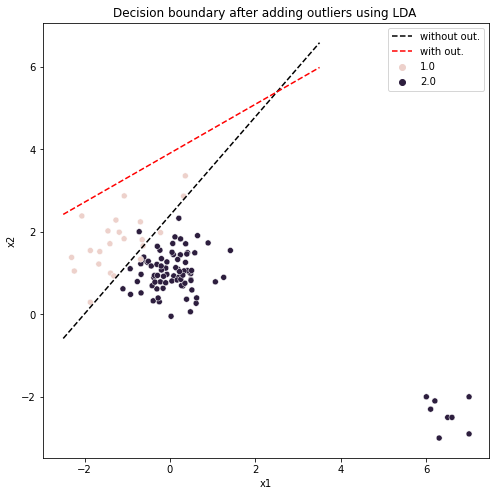

In [67]:
x2 = (-w_lda[0]-w_lda[1]*x1)/w_lda[2]                  # using coefficients estimated without outliers 
x2_out = (-w_lda_out[0]-w_lda_out[1]*x1)/w_lda_out[2]  # using coefficients estimated with outliers 

# Plotting decision boundaries 
plt.figure(figsize = (8, 8))
sns.scatterplot(data = df_train_out, x = "x1", y = "x2", hue = "label")
plt.plot(x1,x2,'k--', label = 'without out.')
plt.plot(x1,x2_out,'r--', label = 'with out.')
plt.xlabel('x1'), ax2.set_ylabel('x2')
plt.title('Decision boundary after adding outliers using LDA ')
plt.legend()

**Comment :** LDA is sensitive to outliers compared to Logistic Regression. Therefore, Logistic Regression is more robust than LDA.


**Conclusion :**
* Logistic Regression is more safe and robust than LDA in that it requires ***no prior assumptions*** on the distribution of the features in each class on one hand. On the other, it is ***less sensitive to outliers***.

* However it is not suitable to ***linearly separable data***. In this case, it is better to opt for LDA. Neverthless, it will be necessary to consider ***regularisation*** to overcome the effect of outliers. 


## 2. Application: handwritten digits recognition 5 & 6
We load 2 matrices which contain each a sequence of examples of 16x16 images 
of handwritten digits which are 5 and 6 here. Each line of the matrix
contains 256 pixel values coding for the gray level of a 16x16 image.

In [69]:
train_5 = np.loadtxt('train_5.txt', delimiter = ',')   # 556 samples
train_6 = np.loadtxt('train_6.txt', delimiter = ',')   # 664 samples

### Examples of images


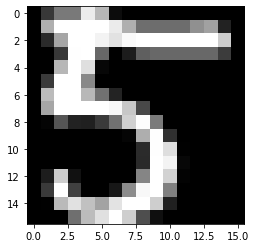

In [70]:
# Digit 5
n = 9;
I = np.reshape(train_5[n,:],(16,16))

plt.imshow(I,cmap='gray')
plt.show()

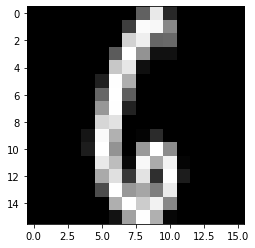

In [71]:
# Digit 6
n = 5;
I = reshape(train_6[n,:],(16,16))

plt.imshow(I,cmap='gray')
plt.show()

### Separating the training and test sets

We keep in the training set the 145 first images of 5s and the 200 first
images of 6s:


In [72]:
# preparing train data
x_train_brut = np.vstack((train_5[:145,:], train_6[:200,:]))
N_train = np.size(x_train_brut,axis=0)

class_train = np.ones((N_train,))       # label 1 for digit 6
class_train[:145] = 0                   # label 0 for digit 5

# preparing test data
x_test_brut = np.vstack((train_5[145:,:], train_6[200:,:]))
N_test = np.size(train_5,axis=0)+np.size(train_6,axis=0)-N_train

class_test = np.ones((N_test,))             # label 1 for digit 6
class_test[:train_5.shape[0] - 145 ] = 0    # label 0 for digit 5

In [73]:
unique, counts = np.unique(class_test, return_counts=True)
dict(zip(unique, counts))

{0.0: 411, 1.0: 464}

## Exercise 2: logistic regression to classify 5 & 6

1. Note that pixel values are between -1 and 1 by using the functions
 `min(I(:))` and `max(I(:))`.
2. Identify the indices of the most significant pixels, which are defined 
as having a standard deviation greater than 0.5 here. We denote by `lis_sig`
the list of positions of these significant pixels in the image vector.
_Indication : the function `std` gives the standard deviation (columnwise
in matrices) and you should find 173 pixel positions.
3. Show a binary image to locate these pixels.
_Indication : `Isig = zeros(16); Isig(list_sig)=1; Isig=Isig';`._
4. Define the training set `x_train` from `x_train_brut` from the significant pixels only.
5. Do the same with `x_test_brut` to extract `x_test`.
6. Use `regression_logistique.m` to estimate the logistic regression vector
`w` from the training set `x_train`. 
Choose `Nitermax = 13; eps_conv = 1e-3;`
7. Compute the decision function and the labels of the test set `x_test`. 
_Indication : do not forget the column of ones !_
8. Estimate the classification error rate by using :
`erreur = sum(abs(class-class_test))/N_test;`.
9. Locate some misclassified examples and visualize the corresponding image.
Comment on your results and observations.


***Question 1: Pixel values***


In [196]:
np.min(I), np.max(I)

(-1.0, 1.0)

***Question 2: Significant pixels *** 

The pixels' indexes of high std deviation are the ones which will contribute mostly to deciding the class of the observation. 

In [75]:
x_train_std = np.std(x_train_brut, axis = 0)
lis_sig = np.where(x_train_std > 0.5)[0]

# assertion test 
print("Nb of indexes : ", lis_sig.shape[0])

Nb of indexes :  173


**Question 3: locating significant pixels **

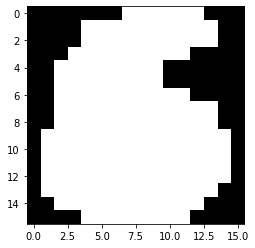

In [76]:
Isig = np.zeros(256)
Isig[lis_sig] = 1
plt.imshow(Isig.reshape((16, 16)),cmap='gray')
plt.show()

**Question 4 & 5: defining the training and the test sets **

In [77]:
# extraction of significant pixels and adding the column of ones
x_train = np.hstack((np.ones((N_train,1)), x_train_brut[:, lis_sig])) 
x_test = np.hstack((np.ones((N_test,1)), x_test_brut[:, lis_sig]))   

**Question 6: estimation of $w$**

In [78]:
w, Niter = regression_logistique(x_train, class_train, Nitermax=13, eps_conv=1e-3)

**Question 7: predicting the labels of the test set**

In [79]:
class_train_pred = log_prediction(x_train, w)    # predicted classes of the training set
class_test_pred = log_prediction(x_test, w)      # predicted classes of the test set

**Question 8: Error rate**

In [82]:
train_error = np.sum(abs(class_train_pred - class_train))/N_train
test_error = np.sum(abs(class_test_pred - class_test))/N_test

# error rates
print("Train error rate : ", train_error*100, "%")
print("Test error rate : ", round(test_error*100,2), '%')

Train error rate :  0.0 %
Test error rate :  7.89 %


In [85]:
# confusion martrix
confusion_matrix(class_test, class_test_pred, normalize='true')  # normalizing along the rows (true labels)

array([[0.89051095, 0.10948905],
       [0.05172414, 0.94827586]])

**Comment**: We observe the overfitting phenomenon. This is due to the limited number of observations in the training set w.r.t to the nb of features considered. 

In [97]:
print('The rate of features w.r.t the nb of observations : ', round(x_train_brut.shape[1]/N_train*100, 2), '%')

The rate of features w.r.t the nb of observations :  74.2 %


**Question 9** : Misclassified images

In [98]:
# index of misclassified images 
misclass_index = np.where(abs(class_test_pred - class_test) == 1)[0]

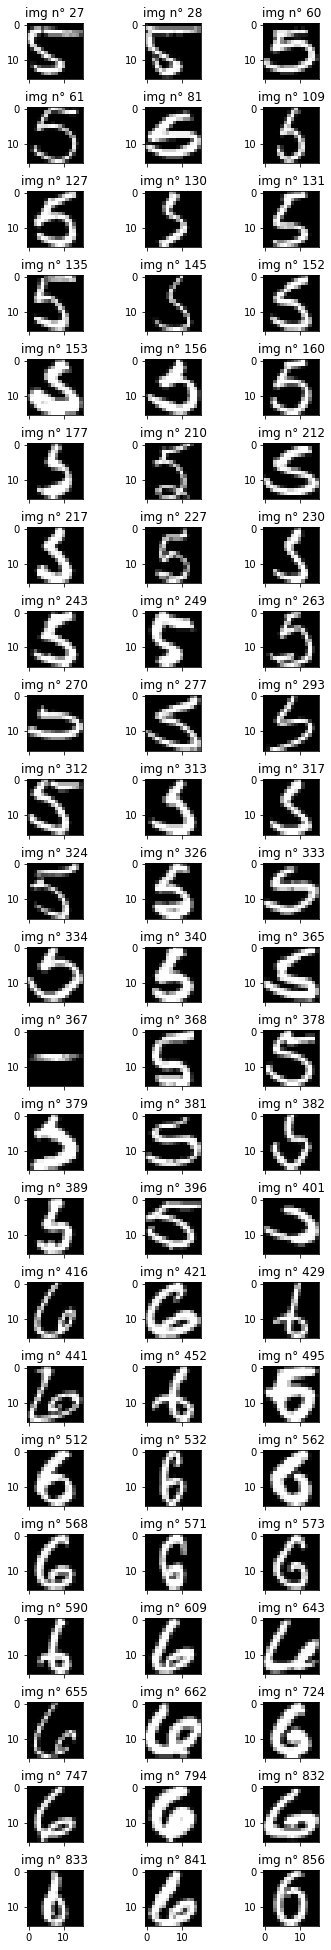

In [99]:
# Plot
fig = plt.figure(figsize= (6, 35))
gs = fig.add_gridspec(23, 3, hspace=0.5)
axs = gs.subplots( sharex=True)

for i in range(misclass_index.size):
    row = i // 3
    column = i % 3
    I = reshape(x_test_brut[misclass_index[i]],(16,16))
    axs[row, column].imshow(I,cmap='gray')
    axs[row, column].set_title("img n° "+str(misclass_index[i]))

plt.show()

**Comment** : 
* Some of the misclassified digits are the ones with a twisted shape (example : img n° $367, 643$ )
* However, some clear images are misclassified as well (see img n° $60, 160$)

**Explanation :**
* The trained model learned the noise in the data as well. It overfitted to the training set
* It is then important to add a regularization term in order to guard against overfitting. 


## 3. Logistic regression using `scikit-learn`

1. **Go to** http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html for a presentation of the logistic regression model in `scikit-learn`.

2. **Apply** it to the present data set.

3. **Comment** on the use of logistic regression.

*Indication : you may have a look at* 

a) Theory : http://openclassroom.stanford.edu/MainFolder/DocumentPage.php?course=MachineLearning&doc=exercises/ex5/ex5.html

b) Video :  https://www.coursera.org/learn/machine-learning/lecture/4BHEy/regularized-logistic-regression 

c) Example : http://scikit-learn.org/stable/auto_examples/exercises/plot_digits_classification_exercise.html#sphx-glr-auto-examples-exercises-plot-digits-classification-exercise-py

*for a short presentation of regularized logistic regression.*

We could like to choose the optimal value of C, therefore we will use 10-fold cross-validation.  

In [127]:
from sklearn.linear_model import LogisticRegression

nb_shuffles  = 20   # nb of shuffles 

# lambda values (inverse of C) : values between 0.1 and 20
lamb_list = np.concatenate((np.linspace(0.1, 0.9, 5), np.arange(1, 20)), axis = 0)

train_err_shuffle = np.zeros((nb_shuffles, lamb_list.size))
valid_err_shuffle = np.zeros((nb_shuffles, lamb_list.size))

for k in range(nb_shuffles):
    indexes = arange(x_train.shape[0])
    np.random.shuffle(indexes)

    x_train_new = x_train[indexes][:, 1:]          # shuffling x_train and removing the column of ones
    class_train_new = class_train[indexes]
    n_test = 34
    n_train = x_train.shape[0] - n_test

    train_err = np.zeros((10, lamb_list.size))
    valid_err = np.zeros((10, lamb_list.size))

    # 10-fold cross-validation 
    for p in range(10):
        valid_ind = arange(p*n_test, (p+1)*n_test)    # indexes for validation set

        valid_set = x_train_new[valid_ind]             # validation set
        valid_class = class_train_new[valid_ind]       # labels of validation set

        train_set = np.delete(x_train_new, valid_ind, axis = 0)         # training set 
        train_class = np.delete(class_train_new, valid_ind, axis = 0)   # labels of the training set

        # loop over values of lambda
        for idx, lamb in enumerate(lamb_list):
            log_model = LogisticRegression(C = 1/lamb) 
            log_model.fit(train_set, train_class)

            train_pred = log_model.predict(train_set)
            valid_pred = log_model.predict(valid_set) 

            train_err[p, idx] = np.sum(abs(train_pred - train_class))/n_train
            valid_err[p, idx] = np.sum(abs(valid_pred - valid_class))/n_test

    train_err_shuffle[k,:] = np.mean(train_err, axis = 0)
    valid_err_shuffle[k,:] = np.mean(valid_err, axis = 0)


Text(0.5, 1.0, 'Evolution of error rate w.r.t to $\\lambda$')

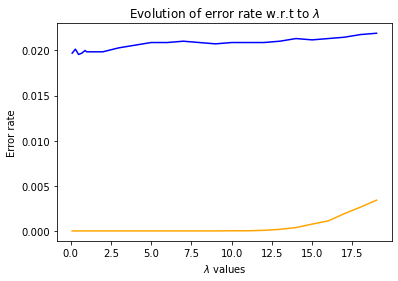

In [129]:
# average error rate on the training and validation sets 
avg_train_err = np.mean(train_err_shuffle, axis = 0)
avg_valid_err = np.mean(valid_err_shuffle, axis = 0)

plt.plot(lamb_list, avg_train_err, color = 'orange')
plt.plot(lamb_list, avg_valid_err, color = 'blue')
plt.xlabel('$\lambda$ values')
plt.ylabel('Error rate')
plt.title('Evolution of error rate w.r.t to $\lambda$')

***Comment :*** The error rate on the validation set does not change much.

In [131]:
best_c = 1/lamb_list[np.argmin(avg_valid_err)]  # best value of c
best_c

2.0

*Prediction on the test set using the optimal value of C*

In [132]:
# defining the model
log_model = LogisticRegression(C = best_c) 
log_model.fit(x_train, class_train)

# prediction 
class_train_pred = log_model.predict(x_train)
class_test_pred = log_model.predict(x_test)

In [134]:
# train and test error rates
train_error = np.sum(abs(class_train_pred - class_train))/N_train
test_error = np.sum(abs(class_test_pred - class_test))/N_test

print("Train error rate : ", round(train_error*100,2), '%')
print("Test error rate : ", round(test_error*100, 2), '%')

Train error rate :  0.0 %
Test error rate :  2.74 %


In [135]:
# confusion matrix
confusion_matrix(class_test, class_test_pred, normalize='true')

array([[0.97323601, 0.02676399],
       [0.02801724, 0.97198276]])

***Comment : *** The problem of overfitting is fixed after adding regularization

*Display of misclassified images*

In [142]:
# index of misclassified images 
misclass_index = np.where(abs(class_test_pred - class_test) == 1)[0]
misclass_index.size

24

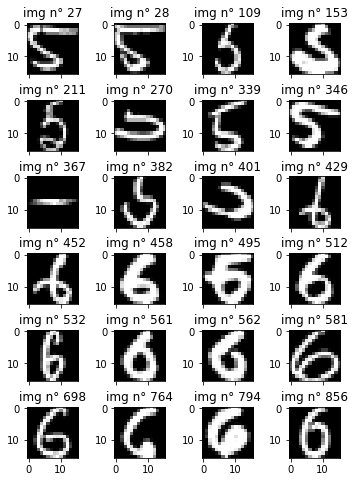

In [141]:
fig = plt.figure(figsize= (6, 8))
gs = fig.add_gridspec(6, 4, hspace=0.5)
axs = gs.subplots( sharex=True)

for i in range(misclass_index.size):
    row = i // 4
    column = i % 4
    I = reshape(x_test_brut[misclass_index[i]],(16,16))
    axs[row, column].imshow(I,cmap='gray')
    axs[row, column].set_title("img n° "+str(misclass_index[i]))

plt.show()

***Comment :*** 
* Using the regularized version of Logistic Regression, the misclassified images are almost only those with digits having a twisted shape. 

***Conclusion :***
* Even though Logistic Regression is robust in terms of sensitivity to outliers, it can yet be sensitive to noise when learning on a limited number of observations w.r.t the nb of features. In this case, it is then important to consider the regularized version of Logistic Regression. 
